In [29]:
from core.classifiers.decision_tree_clf import DecisionTreeClassifier
import numpy as np
import scipy as sp
import collections
from scipy import io
from scipy.special import expit
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# 2.1 Implement Decsion Tree

# 2.2 Implement Random forrest

## Spam Dataset

In [8]:
spam_data = io.loadmat("../HW5_codes/Q2_decision_tree/datasets/spam-dataset/spam_data.mat")

In [27]:
spam_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'test_data', 'training_data', 'training_labels'])

In [31]:
spam_training_data, spam_training_labels, spam_test_data = (spam_data['training_data'], 
                                                                              spam_data['training_labels'][0],
                                                                             spam_data['test_data'])

In [39]:
spam_X_train, spam_X_valid, spam_y_train, spam_y_valid = train_test_split(
     spam_training_data, spam_training_labels, test_size=0.20, random_state=42)

# 2.4 - Performance Evaluation

In [34]:

clf = DecisionTreeClassifier()
clf = clf.fit(spam_X_train[:100], spam_y_train[:100])


In [35]:
clf.pint_tree()

column[19] >= 1.0 ?
--> True:
  Predict 0
  Predict Counter({0: 22})
--> False:
  column[28] >= 1.0 ?
  --> True:
    column[15] >= 1.0 ?
    --> True:
      Predict 0
      Predict Counter({0: 3})
    --> False:
      column[29] >= 4.0 ?
      --> True:
        column[28] >= 10.0 ?
        --> True:
          Predict 1
          Predict Counter({1: 1})
        --> False:
          Predict 0
          Predict Counter({0: 2})
      --> False:
        column[14] >= 1.0 ?
        --> True:
          column[28] >= 5.0 ?
          --> True:
            Predict 1
            Predict Counter({1: 1})
          --> False:
            Predict 0
            Predict Counter({0: 1})
        --> False:
          Predict 1
          Predict Counter({1: 9})
  --> False:
    column[0] >= 1.0 ?
    --> True:
      Predict 1
      Predict Counter({1: 2})
    --> False:
      column[31] >= 1.0 ?
      --> True:
        Predict 0
        Predict Counter({0: 9})
      --> False:
        column[29] >= 5.0 ?


In [36]:
predictions = clf.predict(spam_X_valid)
accuracy_score(predictions, spam_y_valid)

0.6695957820738138

In [37]:
sample_sizes = [100, 200, 500, 1000, 2000]
measurements = []

for s in sample_sizes:
    clf = DecisionTreeClassifier()
    clf = clf.fit(spam_X_train[:s], spam_y_train[:s])
    predictions = clf.predict(spam_X_valid)
    measurements.append(accuracy_score(predictions, spam_y_valid))

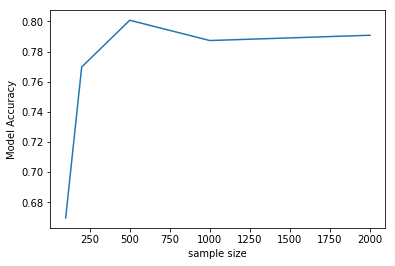

In [38]:
plt.plot(sample_sizes, measurements)
plt.xlabel('sample size')
plt.ylabel('Model Accuracy')
plt.show()

## 2.5

### 2.5.2 - Classify specific point 
- TODO: implement a trace function that returns the trace of a point 

### 2.5.5 

In [48]:
max_depth = list(range(1, 41))
measurements = []

for d in max_depth:
    clf = DecisionTreeClassifier(max_depth=d)
    clf = clf.fit(spam_X_train, spam_y_train)
    predictions = clf.predict(spam_X_valid)
    measurements.append(accuracy_score(predictions, spam_y_valid))
    print("Achieved %d accuracy with max_depth %d" % (measurements[-1], d))

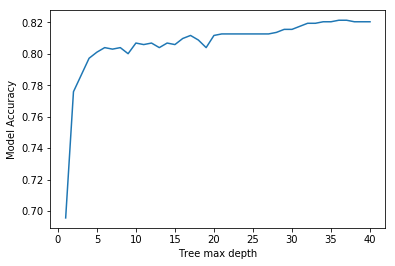

In [49]:
plt.plot(max_depth, measurements)
plt.xlabel('Tree max depth')
plt.ylabel('Model Accuracy')
plt.show()

# 2.6 Titanic